## Find fourier transform of an image and then its inverse

In [3]:
import sys
sys.path.append('../')
import trying

SyntaxError: invalid syntax (1279064374.py, line 1)

In [3]:
from image import Image, DFT


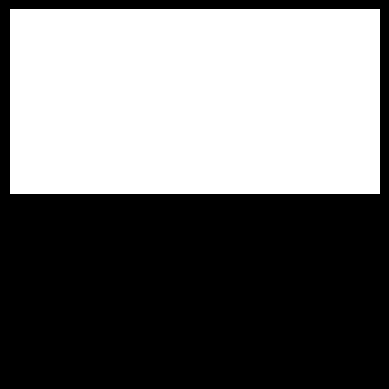

In [4]:
#have an image with rectangular stripes in vertical direction


img = Image()
import numpy as np

img.data = np.zeros((32, 32), dtype=np.uint8)

for i in range(32):
    for j in range(32):
        if i % 32 < 16:
            img.data[i][j] = 255
        else:
            img.data[i][j] = 0

img.display()

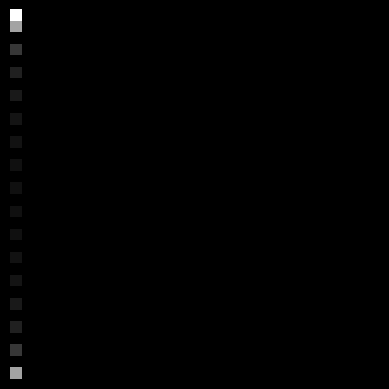

In [5]:
dft = DFT(img)
dft.amplitude().display()

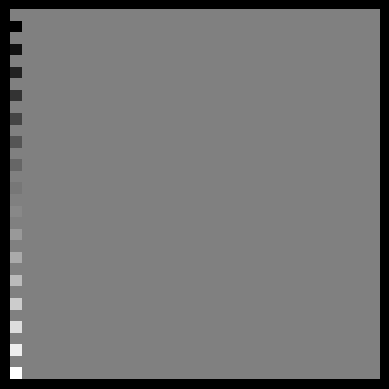

In [6]:
dft.phase().display()

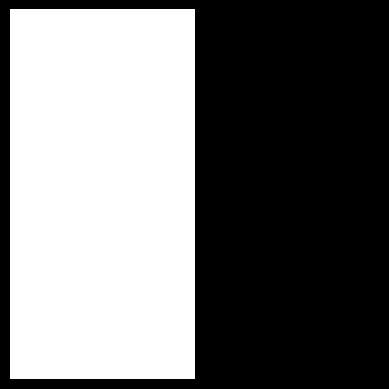

In [7]:
img = Image()
import numpy as np

img.data = np.zeros((32, 32), dtype=np.uint8)

for j in range(32):
    for i in range(32):
        if j % 32 < 16:
            img.data[i][j] = 255
        else:
            img.data[i][j] = 0

img.display()

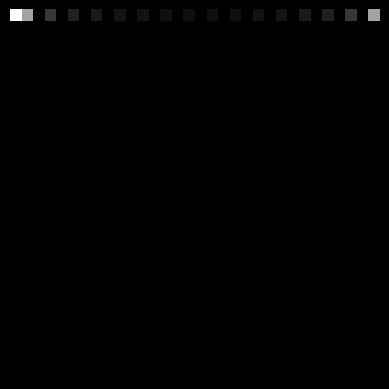

In [8]:
dft = DFT(img)
dft.amplitude().display()

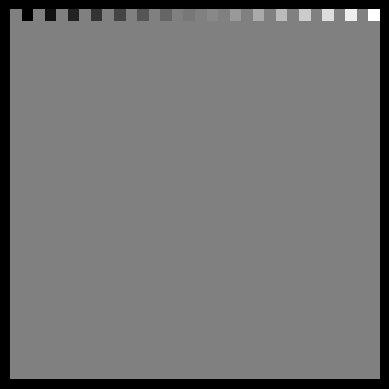

In [9]:
dft.phase().display()

In [10]:
%load_ext autoreload
%autoreload 2

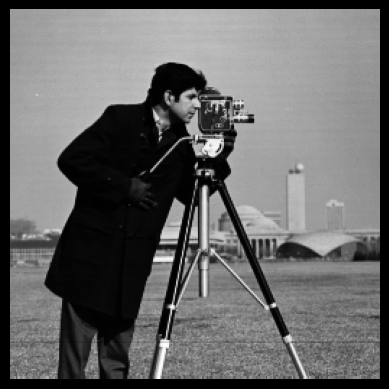

In [11]:
img = Image('../Images/cameraman.tif')
# img = Image()
import numpy as np
# img.data = np.zeros((256, 256))
# for i in range(64,256):
#     img.data[i, i] = 1
img.display()

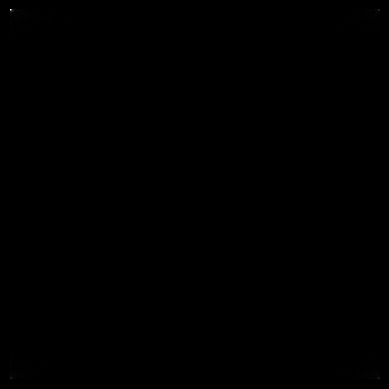

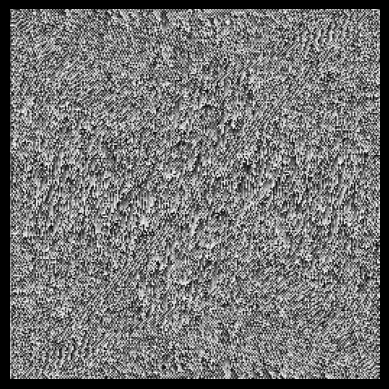

In [12]:
dft = DFT(img)

dft.amplitude().display()
dft.phase().display()

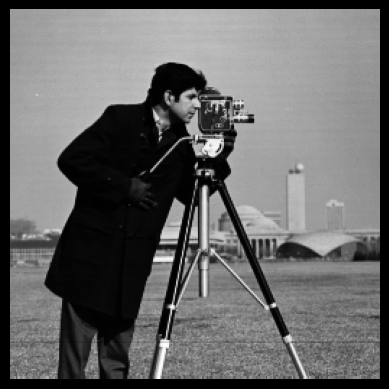

In [13]:
dft.inverse().display()

## Rotation property of Fourier transform

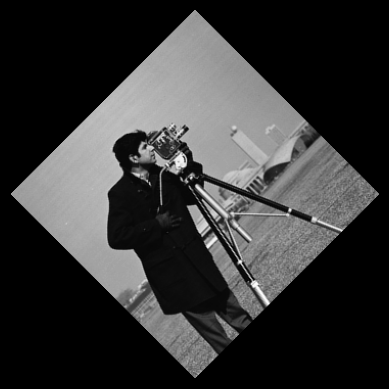

In [14]:
img.rotate(45).display()

In [15]:
i = img.rotate(25).rotate(-25)

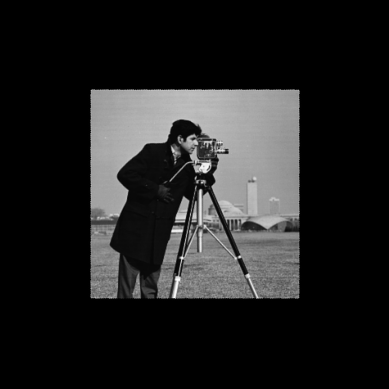

In [16]:
i.display()

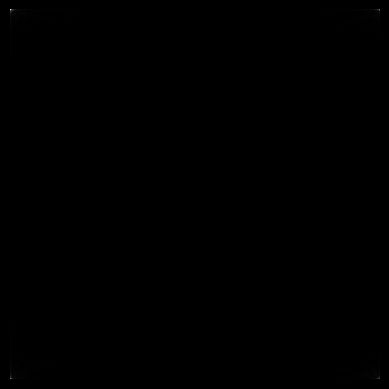

In [17]:
DFT(i).amplitude().display()

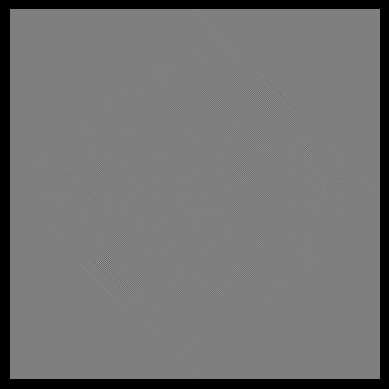

In [18]:
DFT.inverse(dft.rotate(45)).rotate(-45).display()

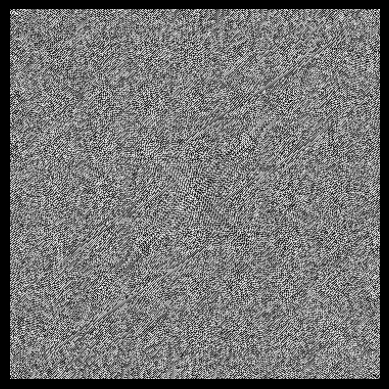

In [19]:
DFT(img.rotate(45)).phase().display()

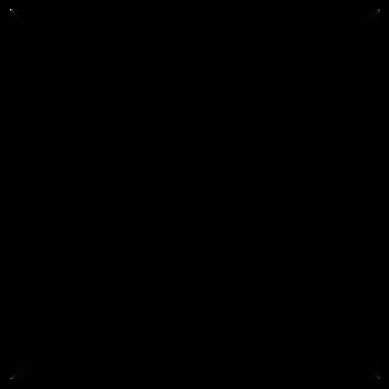

In [20]:
DFT(img.rotate(45)).amplitude().display()

## Convolution property of Fourier transform

In [21]:
img1 = Image('../Images/cameraman.tif')

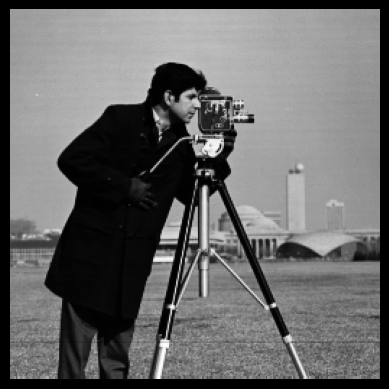

In [22]:
img1.display()

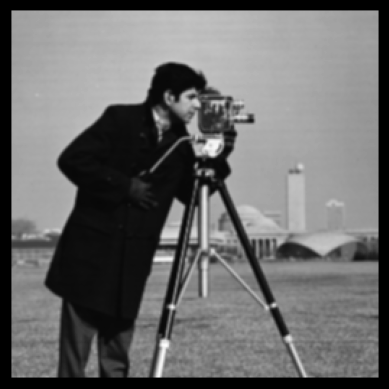

In [23]:
from image import ImageFilters

ImageFilters.convolve(img1, ImageFilters.gaussian).display()

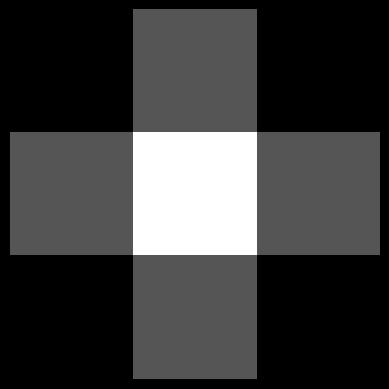

In [24]:
img2 = Image()
img2.data = ImageFilters.gaussian 
img2.display()

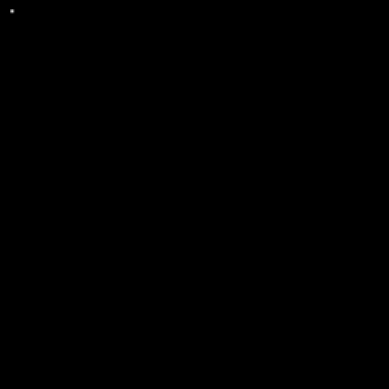

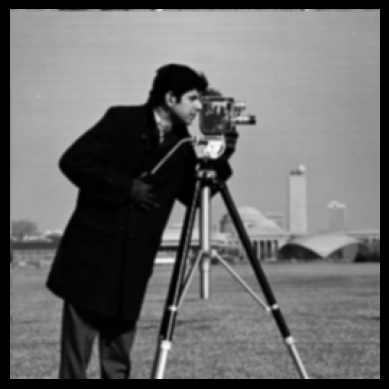

In [25]:
img2.data = np.pad(img2.data, ((0, 256 - img2.data.shape[0]), (0, 256 - img2.data.shape[1])), 'constant')

img2.display()

dft1 = DFT(img1)
dft2 = DFT(img2)

dft12 = DFT()

dft12.data = dft1.data * dft2.data

DFT.inverse(dft12).display()

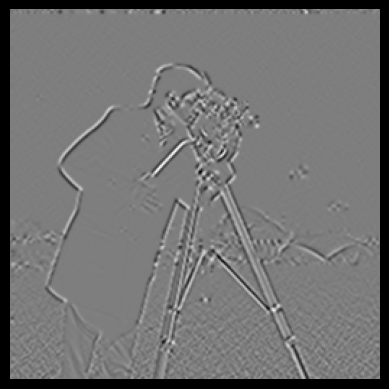

In [31]:
gb_y = Image()
gb_y.data = ImageFilters.sobel_y

# add padding to make the size of the image and the filter the same
gb_y.data = np.pad(gb_y.data, ((0, img1.data.shape[0] - gb_y.data.shape[0]), (0, img1.data.shape[1] - gb_y.data.shape[1])), 'constant')

img_dft = DFT(img1)
gb_y_dft = DFT(gb_y)


gb_x = Image()
gb_x.data = ImageFilters.sobel_x
gb_x.data = np.pad(gb_x.data, ((0, img1.data.shape[0] - gb_x.data.shape[0]), (0, img1.data.shape[1] - gb_x.data.shape[1])), 'constant')


gb_x_dft = DFT(gb_x)

sol = Image()
sol.data = img_dft.data * gb_y_dft.data + img_dft.data * gb_x_dft.data
DFT.inverse(sol).display()

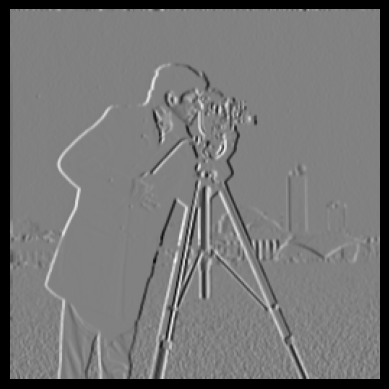

In [27]:
gb_y = Image()
gb_y.data = ImageFilters.sobel_x

# add padding to make the size of the image and the filter the same
gb_y.data = np.pad(gb_y.data, ((0, img1.data.shape[0] - gb_y.data.shape[0]), (0, img1.data.shape[1] - gb_y.data.shape[1])), 'constant')

img_dft = DFT(img1)
gb_y_dft = DFT(gb_y)

sol = Image()
sol.data = img_dft.data * gb_y_dft.data
DFT.inverse(sol).display()

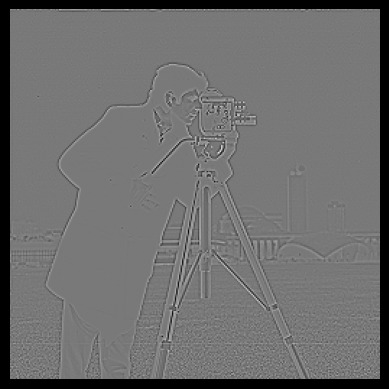

In [28]:
gb_y = Image()
gb_y.data = ImageFilters.laplacian

# add padding to make the size of the image and the filter the same
gb_y.data = np.pad(gb_y.data, ((0, img1.data.shape[0] - gb_y.data.shape[0]), (0, img1.data.shape[1] - gb_y.data.shape[1])), 'constant')

img_dft = DFT(img1)
gb_y_dft = DFT(gb_y)

sol = Image()
sol.data = img_dft.data * gb_y_dft.data
DFT.inverse(sol).display()